# Introduction to Plotting in Matplotlib

This is Part 1 of two part introduction to the type of plotting we'll do in this class. 

`Matplotlib` is a popular as well as powerful library for creating plots (and maps, which we'll learn about later) in Python.  Although there are other plotting options in the Python ecoystem (and you are welcome to use them!), the examples I'll provide in this class with use this package.  

This notebook provides a very short introduction to Matplotlib.  The package has so many options and capabilities is would be challenging to even scratch the surface.  So here I want to provide you with the basics that will allow you to complete Homework Assignment #1 and start to explore its features on your own.  When it comes time to make maps, we'll spend some time working together on that specifically.  

If you want to learn more about Matplotlib right now, though, you can see the tutorials that the developers provide here: https://matplotlib.org/stable/tutorials/index.html

For now, let's go ahead and import `numpy` as usual, as well as the core of `matplotlib` as `mpl` and separately the specific `matplotlib.pyplot` library as `plt`, which provides direct access to the pyplot capabilities:

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# you can omit the line below if you'd like, but I really don't like the default fonts in Python, so I switch to Helvetica
plt.rcParams['font.family'] = 'Helvetica'


Let's create some generic data to plot.  We'll use `np.linspace` to create 256 points equally spaced between negative pi and pi, including the endpoints.  We'll then turn these points into sine and cosine waves to use in some pretty plots:

In [2]:
# create some data to plot
X = np.linspace(-np.pi, np.pi, 256, endpoint=True) # create a series of 256 points from negative pi to pi, including the endpoints
C, S = np.cos(X), np.sin(X) # take those points we just generated in the line above and create sine and cosine curves


Next, let's look at the basic anatomy of a plot.  Matplotlib graphs your data in **Figures**, each of which can contain one or more **Axes**.  [There are actually two different ways to approach plotting in Matplotlib](https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/): 
* _Explicitly_ create Figures and Axes and then call methods on those objects using the `.method` notation - this is called the 'object-oriented approach'
* _Implicitly_, which relies on calling `pyplot` (which we imported above as `plt`) to create and manage the Figures and Axes, and use the `pyplot` functions for plotting. This is how MATLAB itself does it, for instance

You'll see both methods in use out there in the wilds of the internet.  Here we'll start with the `pyplot` method to introduce these concepts, but then we'll switch to using the object oriented explicit approach, [which is what the developers recommend](https://matplotlib.org/stable/tutorials/introductory/lifecycle.html).   

First, we'll declare the figure using `plt.figure`.  We can also pass arguments to this function in the parentheses, including figure size as I do here.  If you don't specify the figure size, Matplotlib will select one that is appropriate to the data.  

Then we'll call two `plt.plot` commands to plot the two lines.  If we don't specify specific colors, once again Matplotlib will select them for us from its defaults.



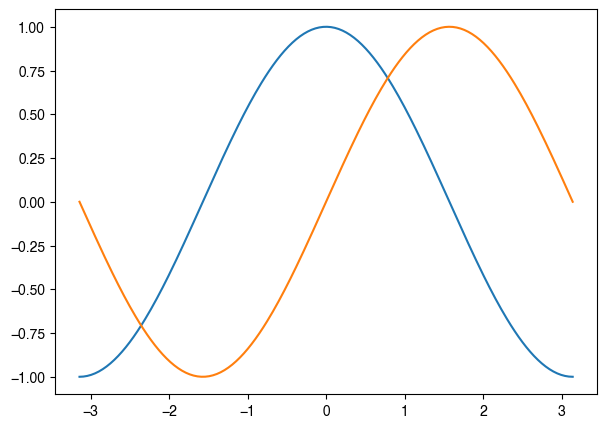

In [3]:
fig = plt.figure(figsize=(7, 5))
plt.plot(X, C) # plot the cosine wave, specifying the x-axis data first and y-axis data second
plt.plot(X, S) # plot the sine wave

plt.show() # show the plot


We can elaborate the plot as well.  Using the pyplot method, this is done with a series of `plt.` type commands in the same codeblock.  So below, we specify the x-axis label, the y-axis label, and a title:

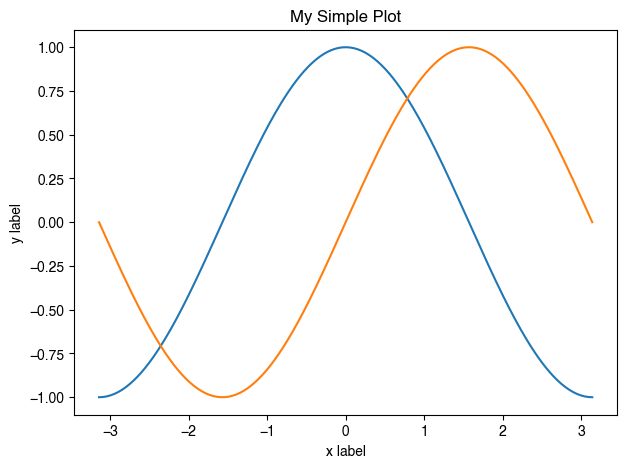

In [4]:
fig = plt.figure(figsize=(7, 5))
plt.plot(X, C) # plot the cosine wave
plt.plot(X, S) # plot the sine wave
plt.xlabel('x label') # specify the x axis label
plt.ylabel('y label') # specify the y axis label
plt.title("My Simple Plot") # provide a title for the plot

plt.show() # show the plot


If we want to include a legend in our plot, we can add information to the `plt.plot` commands to label each plotted series, and then call `plt.legend` to use those labels to create a legend:

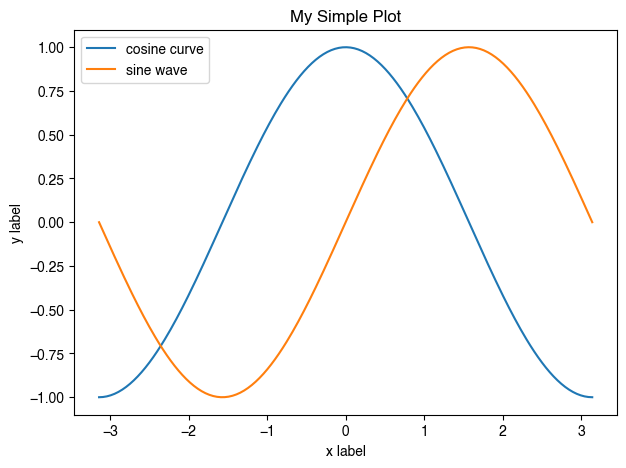

In [5]:
fig = plt.figure(figsize=(7, 5))
plt.plot(X, C, label='cosine curve')  # plot the cosine wave and give it a label
plt.plot(X, S, label='sine wave')  # plot the sine wave and give it a label
plt.xlabel('x label')  # specify the x axis label
plt.ylabel('y label')  # specify the y axis label
plt.title("My Simple Plot")  # provide a title for the plot
plt.legend() # create the legend using the labels in the plot commands above

plt.show()  # show the plot


We can also add additional information to the `plt.plot` commands, for instance we can modify the line color or type and we can specify the position of the legend:

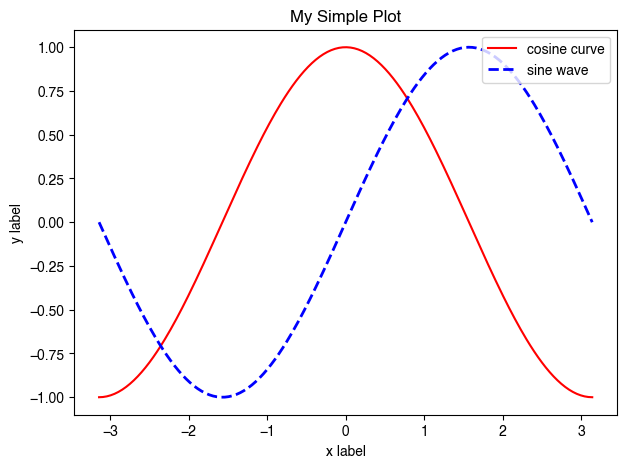

In [6]:
fig = plt.figure(figsize=(7, 5))
plt.plot(X, C, label='cosine curve',color='red')  # plot the cosine wave
plt.plot(X, S, label='sine wave',color='blue',linewidth=2, linestyle='--')  # plot the sine wave
plt.xlabel('x label')  # specify the x axis label
plt.ylabel('y label')  # specify the y axis label
plt.title("My Simple Plot")  # provide a title for the plot

# see more here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.legend(loc='upper right')

plt.show()  # show the plot


We can make the same figure using the explicit object-oriented approach, which we'll try to stick to going forward - in this case, we see that the object is **ax** (the axes we're going to plot on) and so the methods are applied to that object using the `.method` syntax:

### Subplots and scatter plots

We'll definitely want to make some scatter plots in this course!

First, let's use NumPy to generate some random data for us, using `np.random.randn`.  The `randn` means the random numbers will be drawn from a normal (Gaussian) distribution.  We can create mutiple series by 'casting' the output to multiple variables on the same line for convenience:

In [7]:
data1, data2, data3, data4 = np.random.randn(4, 100) # this creates 4 different 100 element random arrays of numbers

Scatter plots can be created using `scatter`. Let's also create mutiple axes in the same figure using `plt.subplots` - note that we actually don't need to call `plt.figure` separately here - we can specify the `fig` output and the figure size right in `plt.subplots`. Also note that we'll use the 'object-oriented' approach first - we create the axes `ax1` and `ax2` and then we use the `.scatter` method to create a scatter plot in that axis.  We can also fine-tune the appearance of the axes this way:

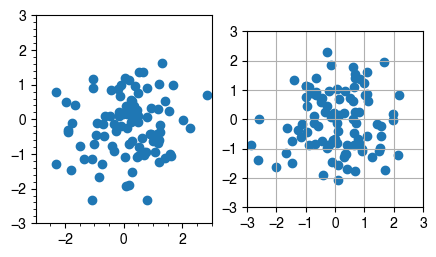

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
ax1.scatter(data1,data2) # scatter plot on the first axis
ax2.scatter(data3,data4) # scatter plot on the second axis

ax1.set_xlim([-3, 3])
ax1.set_ylim([-3, 3])
ax1.minorticks_on()

ax2.set_aspect('equal', 'box')
ax2.set_xlim([-3, 3])
ax2.set_ylim([-3, 3])
ax2.set_xticks([-3,-2,-1,0,1,2,3])
ax2.grid()

plt.show()

So, while calling `plt` directly is simple and also intuitive if you've come (like me) from MATLAB, it is highly recommended that you use the explicit object oriented approach.  Looking at the case of multiple subplots above emphasizes why this is a good idea - it provides clear and fine scale control on your plots. 

The `.subplots` approach generalizes to other arrangements of subplots as well.  In the example below, we create 9 subplots in 3 rows and 3 columns. We can also pass a 'layout' command to `plt.subplots`.  Here I select '[constrained](https://matplotlib.org/stable/tutorials/intermediate/constrainedlayout_guide.html)', which adjusts the subplots and their elements so that they fit in the figure while still preserving, the layout.  Alternatively, you could select '[tight](https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html)', which does something similar. 

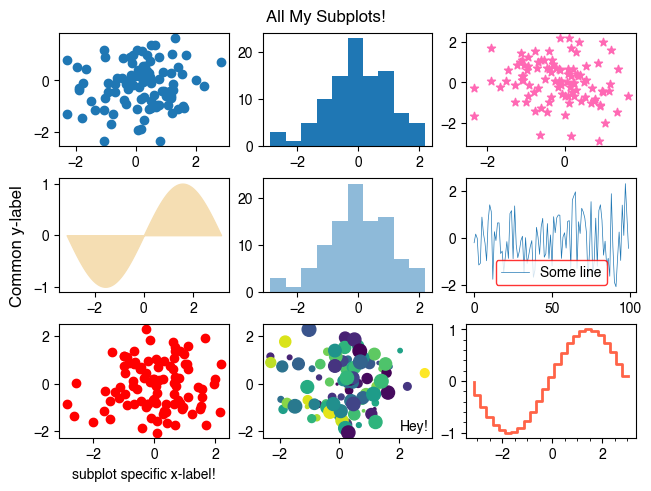

In [9]:
fig, axs = plt.subplots(3,3,layout='constrained')

# A simple scatter plot using the explicit method, but see how we index into the specific subplot
axs[0,0].scatter(data1,data2) 

# a histogram of your data, see https://matplotlib.org/stable/gallery/statistics/hist.html
axs[0, 1].hist(data3)

# a scatter plot but we change the markers and color, 
# for markers, see https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers
# for named colors, see https://matplotlib.org/stable/gallery/color/named_colors.html
axs[0,2].scatter(data2,data3,marker='*',color='hotpink')

# fill the space between two lines, https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
axs[1,0].fill_between(X,S,color='wheat')

# a histogram, but change the opacity using alpha passed to the histogram method
axs[1,1].hist(data3,alpha=0.5)

# a line plot, but change the width and provide a label
axs[1,2].plot(data4,linewidth=0.5,label='Some line')

# create a legend, place it in a location, and change the color of the box around it
axs[1, 2].legend(loc='lower center',edgecolor='red')

# simple scatter plot, but change the color to red
axs[2,0].scatter(data3,data4,color='red')

# provide an x-axis label for just this plot
axs[2,0].set_xlabel('subplot specific x-label!')

# scatter plot, but specify a size and color for each point
axs[2,1].scatter(data1, data4, s=np.arange(100), c=np.random.rand(100))

# place text in the axes
axs[2,1].text(2,-2,'Hey!')

# a step plot
axs[2, 2].step(X[1::10], S[1::10],linewidth=2,color='tomato')

# turn on the minor ticks on both x and y axis
axs[2, 2].minorticks_on()

# you can modify the figure too (e.g. for titles or overall axis labels)
fig.suptitle('All My Subplots!') # an overall title, note that the object is the figure, not the axes!
fig.supylabel('Common y-label') # an overall y-label, note that the object is the figure, not the axes 

fig.savefig('multipanel.pdf') # save a vector-formatted figure for publication (eps, svd, pdf)
fig.savefig('multipanel.png') # save a raster for online, presentations, etc. 


plt.show()

As you can see, there are just an amazing number of options for plotting your data and styling the plot to your liking.  We'll get another tutorial when it is time to use Matplotlib for mapping, but for now you can continue to explore additional options and features here:

https://matplotlib.org/stable/gallery/index.html

https://matplotlib.org/stable/tutorials/index.html
